## Table of Contents
* [1. Exploration](#exploration)
    * [1.1 Raw Data Summary](#raw_data_summary)
        * [1.1.1 Descriptive Statistics](#descriptive_statistics)
        * [1.1.2 Visualization](#visualization)
    * [1.2 Investigating Outliers](#investigating_outliers)
        * [](#)
    * [1.3 Investigating Missing Values](#investigating_missing_values)
        * [](#)
* [2. Modelling](#modelling)
    * [2.1 Logistic Regression](#logistic_regression)
        * [](#)
    * [2.2 Naive Bayes](#naive_bayes)
        * [](#)
    * [2.3 Linear Discriminant Analysis](#linear_discriminant_analysis)
        * [](#)
    * [2.4 Support Vector Machines](#support_vector_machines)
        * [](#)
    * [2.5 K-Nearest Neighbors](#k_nearest_neighbors)
        * [](#)
    * [2.6 Decision Trees](#decision_trees)
        * [](#)
    * [2.7 Random Forests](#random_forests)
        * [](#)
    * [2.8 AdaBoost](#adaboost)
        * [](#)
    * [2.9 XGBoost](#xgboost)
        * [](#)
    * [2.9 Ensemble Voting CLassifier](#ensemble_voting_classifier)
        * [](#)

In [52]:
## ---*--- Importing Necessary Packages ---*---
## setting up notebook environment for analysis

# General Tools:
import os, sys  # standard python libraries
import pandas as pd
import numpy as np
import scipy as spy
import itertools  # combinatorics toolkit
import time  # for obtaining computation execution times

# Data Pre-Processing:
from sklearn.preprocessing import StandardScaler  # for standardizing data
from collections import Counter  # object class for counting element occurences

# Machine Learning Classifiers:
from xgboost import XGBClassifier  # xgboost classifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron  # linear classifiers
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier  # decision tree classifiers
from sklearn.svm import SVC  # support-vector machine classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # LDA classifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier  # Nearest-Neighbors classifier
        
# Feature and Model Selection:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold  # train/test splitting tool for cross-validation
from sklearn.model_selection import GridSearchCV  # hyperparameter optimization tool via exhaustive search
from sklearn.model_selection import cross_val_score  # automates cross-validated scoring
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc  # scoring metrics
from sklearn.feature_selection import RFE  # recursive feature elimination
from sklearn.model_selection import learning_curve  # learning-curve generation for bias-variance tradeoff
from sklearn.model_selection import validation_curve  # for fine-tuning hyperparameters
from sklearn.pipeline import Pipeline

# Plotting:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Manage Warnings: 
import warnings
warnings.filterwarnings('ignore')

# set_option to display all columns of DF during preview summaries
pd.set_option('display.max_columns', None)

In [ ]:
# WTF is the problem here? :(
'''from ..src.util import *

add(2, 3)
who_is_goat()'''

## 1. Exploration <a class="anchor" id="exploration"></a>
This is chapter number 1

### 1.1 Raw Data Summary <a class="anchor" id="raw_data_summary"></a>

##### 1.1.1 Descriptive Statistics <a class="anchor" id="descriptive_statistics"></a>

##### 1.1.2 Visualization <a class="anchor" id="visualization"></a>

### 1.2 Investigating Outliers <a class="anchor" id="investigating_outliers"></a>
This is section...

### 1.3 Investigating Missing Values <a class="anchor" id="investigating_missing_values"></a>
This is section...

## 2. Modelling <a class="anchor" id="modelling"></a>
This is chapter number 1

In [2]:
# load processed data and display DF summary
df = pd.read_csv('../data/processed/processed_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8102 entries, 0 to 8101
Columns: 158 entries, has_null to field_sociology
dtypes: float64(158)
memory usage: 9.8 MB


In [3]:
df.describe()

,has_null,wave,age,age_o,d_age,d_d_age,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match,person_id,nulls_byRow,gender_female,gender_male,race_Asian/Pacific Islander/Asian-American,race_Black/African American,race_European/Caucasian-American,race_Latino/Hispanic American,race_Other,race_o_?,race_o_Asian/Pacific Islander/Asian-American,race_o_Black/African American,race_o_European/Caucasian-American,race_o_Latino/Hispanic American,race_o_Other,field_anthropology,field_architecture,field_art,field_biology,field_business,field_chemistry,field_communications,field_economics,field_education,field_engineering,field_environmental science,field_finance,field_health,field_history,field_law,field_literature,field_mathematics,field_medicine,field_other/job,field_philosophy,field_physics,field_political science,field_psychology,field_religion,field_sociology
count,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.00000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.0

In [49]:
from sklearn.model_selection import train_test_split

# full feature set list
training_feature_list = [col_name for col_name in df.columns if col_name not in ['has_null', 'wave', 'nulls_byRow', 'person_id', 'decision', 'decision_o', 'match']]

# we will also further subdivide into a feature dataframe (X) a class dataframe (y, for 'Survived')
X = df[training_feature_list]
y = df['match']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.25)

In [55]:
def get_clf_name(classifier_object):
    """
    Returns  a string representing the name of the input classifier object. 
    
    """
    name_ = str(type(classifier_object)).split('.')[-1]
    for char in """ "'>() """:  # triple-quoted string definition allows us to include " and ' as characters
        name_ = name_.replace(char,"")  # delete unwanted characters from the name
    
    return name_


def train_classifier_ensemble_CV(classifiers, X_data, y_data, clf_params=None, cv_splits=10, 
                                 random_state=42, return_trained_classifiers=False, verbose=0):
    """
    Trains a list of classifiers on the input training data and returns cross-validated accuracy and f1 scores
    as well as feature_importances (where available). The list of trained classifier objects is also returned
    upon request. 
    
    : param classifiers : List of classifier objects; expects each has a scikit-learn wrapper. 
    
    : param X_data : Pandas dataframe containing our training features. 
    
    : param y_data : Pandas dataframe containing our training class labels.
    
    : param clf_params : (Optional) List of dictionaries containing parameters for each classifier object
                         in the list 'classifiers'. If not provided, the already-initialized parameters of
                         each classifier object will be used. 
                         
    : param cv_splits : Integer number of cross-validation splits. 
    
    : param random_state : Seed for reproducibility between executions. 
    
    : param return_trained_classifiers : Boolean; if True, function will also return a list containing the
                                         fit classifier objects. 
                                         
    : param verbose : The amount of status text displayed during execution; 0 for less, 1 for more. 

    : return clf_comparison : A pandas dataframe tabulating the cross-validated performance of each classifier. 
    
    : return mean_feature_importances : An array containing the ranked feature importances for each classifier
                                        having the feature_importances_ attribute. 
                                        
    : return trained_classifiers : (if return_trained_classifiers=True) A list of trained classifier objects. 
    
    """
    # initialization
    kfold = StratifiedKFold(n_splits=cv_splits, random_state=random_state, shuffle=True)
    
    train_accuracy_mean = []
    train_accuracy_std = []
    test_accuracy_mean = []
    test_accuracy_std = []
    f1_score_mean = []
    f1_score_std = []
    mean_feature_importances = []
    trained_classifiers = []
    classifier_name = []
    
    if clf_params is None:  # construct using classifier's existing parameter assignment
        clf_params = []
        for clf in classifiers:
            params = clf.get_params() 
            if 'random_state' in params.keys():  # assign random state / seed
                params['random_state'] = random_state
            elif 'seed' in params.keys():
                params['seed'] = random_state
            clf_params.append(params)
    
    # step through the classifiers for training and scoring with cross-validation
    for clf, params in zip(classifiers, clf_params):
        
        # automatically obtain the name of the classifier
        name = get_clf_name(clf)
        classifier_name.append(name)
        
        if verbose == 1:  # print status
            print('\nPerforming Cross-Validation on Classifier %s of %s:' 
                  % (len(classifier_name), len(classifiers)))
            print(name)
        
        # perform k-fold cross validation for this classifier and calculate scores for each split
        kth_train_accuracy = []
        kth_test_accuracy = []
        kth_test_f1_score = []
        kth_feature_importances = []
        
        for (train, test) in kfold.split(X_data, y_data):
        
            clf.set_params(**params)
            clf.fit(X_data.iloc[train], y_data.iloc[train])
            
            kth_train_accuracy.append(clf.score(X_data.iloc[train], y_data.iloc[train]))
            kth_test_accuracy.append(clf.score(X_data.iloc[test], y_data.iloc[test]))
            kth_test_f1_score.append(f1_score(y_true=y_data.iloc[test], y_pred=clf.predict(X_data.iloc[test])))
            
            if hasattr(clf, 'feature_importances_'):  # some classifiers (like linReg) lack this attribute
                kth_feature_importances.append(clf.feature_importances_)
        
        # populate scoring statistics for this classifier (over all cross-validation splits)
        train_accuracy_mean.append(np.mean(kth_train_accuracy))
        train_accuracy_std.append(np.std(kth_train_accuracy))
        test_accuracy_mean.append(np.mean(kth_test_accuracy))
        test_accuracy_std.append(np.std(kth_test_accuracy))
        f1_score_mean.append(np.mean(kth_test_f1_score))
        f1_score_std.append(np.std(kth_test_f1_score))
    
        # obtain array of mean feature importances, if this classifier had that attribute
        if len(kth_feature_importances) == 0:
            mean_feature_importances.append(False)
        else:
            mean_feature_importances.append(np.mean(kth_feature_importances, axis=0))
        
        # if requested, also export classifier after fitting on the complete training set 
        if return_trained_classifiers is not False:
            clf.fit(X_data, y_data)
            trained_classifiers.append(clf)
            
        # remove AdaBoost feature importances (we won't discuss their interpretation)
        if type(clf) == type(AdaBoostClassifier()):
            mean_feature_importances[-1] = False
        
    
    # construct dataframe for comparison of classifiers
    clf_comparison = pd.DataFrame({'Classifier Name' : classifier_name, 
                                   'Mean Train Accuracy' : train_accuracy_mean, 
                                   'Train Accuracy Standard Deviation' : train_accuracy_std,
                                   'Mean Test Accuracy' : test_accuracy_mean, 
                                   'Test Accuracy Standard Deviation' : test_accuracy_std, 
                                   'Mean Test F1-Score' : f1_score_mean,
                                   'F1-Score Standard Deviation' : f1_score_std})
    
    # enforce the desired column order
    clf_comparison = clf_comparison[['Classifier Name', 'Mean Train Accuracy',
                                     'Train Accuracy Standard Deviation', 'Mean Test Accuracy',
                                     'Test Accuracy Standard Deviation', 'Mean Test F1-Score',
                                     'F1-Score Standard Deviation']]
                   
    
    # add return_trained_classifiers to the function return, if requested, otherwise omit                                                
    if return_trained_classifiers is not False:
        return clf_comparison, mean_feature_importances, trained_classifiers
    else:
        return clf_comparison, mean_feature_importances

    
def plot_mean_feature_importances(clf_comparison, mean_feature_importances, X_data):
    """
    Generates bar plots of feature importances using the results of train_classifier_ensemble_CV.
    
    : param clf_comparison : A pandas dataframe comparing cross-validated classifier performances; 
                             one of the return parameters of the train_classifier_ensemble_CV function. 
    
    : param mean_feature_importances : An array of feature importances, generated by the 
                                       train_classifier_ensemble_CV function. 
    
    : param X_data : A pandas dataframe of the feature data used in the creation of clf_comparison and 
                     mean_feature_importances.
                     
    : return : None. 

    """
    for clf_name, importances in zip(clf_comparison['Classifier Name'], mean_feature_importances):

        if importances is not False:

            indices = np.argsort(importances)[::-1]
            feature_labels = X_data.columns

            plt.figure(figsize=(12,5))
            plt.title('Feature Importances for ' + clf_name)
            plt.bar(range(X_data.shape[1]), importances[indices], color='lightblue', align='center')
            plt.xticks(range(X_data.shape[1]), feature_labels[indices], rotation=90)
            plt.xlim([-1, X_data.shape[1]])
            plt.tight_layout()
            plt.show()
        
    return

In [58]:
num_jobs = -1

classifier_list = [LogisticRegression(n_jobs=num_jobs), 
                   SGDClassifier(alpha=0.01, n_jobs=num_jobs), 
                   DecisionTreeClassifier(), 
                   ExtraTreeClassifier(max_depth=5, min_samples_split=10, splitter='random'), 
                   RandomForestClassifier(n_estimators=100, n_jobs=num_jobs), 
                   #LinearDiscriminantAnalysis(n_components=5, solver='svd'), 
                   SVC(shrinking=True, kernel='rbf'), 
                   XGBClassifier(booster='gbtree', n_jobs=num_jobs), 
                   GradientBoostingClassifier(n_estimators=100, loss='deviance'), 
                   AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=50)]

In [59]:
clf_comp_Full_FeatureSet, mean_feature_importances = train_classifier_ensemble_CV(classifiers=classifier_list, 
                                                                                 X_data=X_train, 
                                                                                 y_data=y_train)

# display the comparison results
clf_comp_Full_FeatureSet

/Users/efwerr/miniforge3/envs/aml_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Classifier Name,Mean Train Accuracy,Train Accuracy Standard Deviation,Mean Test Accuracy,Test Accuracy Standard Deviation,Mean Test F1-Score,F1-Score Standard Deviation
0,LogisticRegression,0.860599,0.002139,0.853031,0.010574,0.438062,0.035405
1,SGDClassifier,0.816272,0.068358,0.809412,0.078959,0.320155,0.126176
2,DecisionTreeClassifier,1.000000,0.000000,0.786866,0.012122,0.373641,0.026662
3,ExtraTreeClassifier,0.835601,0.002918,0.831797,0.005149,0.072060,0.069630
4,RandomForestClassifier,1.000000,0.000000,0.856980,0.006651,0.352958,0.043007
5,SVC,0.831797,0.000068,0.831797,0.000615,0.000000,0.000000
6,XGBClassifier,1.000000,0.000000,0.863399,0.008887,0.515069,0.037979
7,GradientBoostingClassifier,0.892235,0.001872,0.863396,0.008603,0.474958,0.035793
8,AdaBoostClassifier,1.000000,0.000000,0.784399,0.013059,0.370997,0.029860


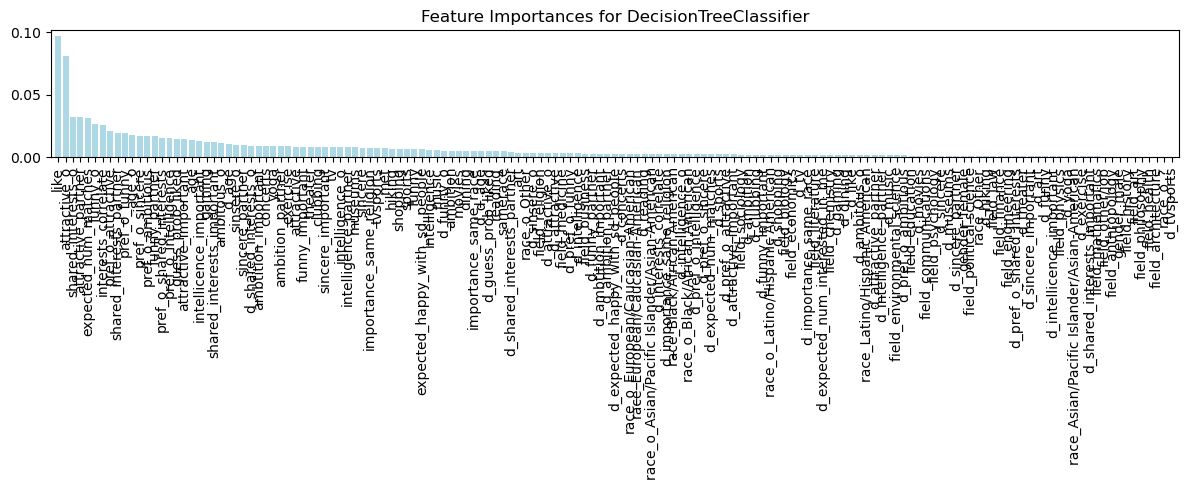

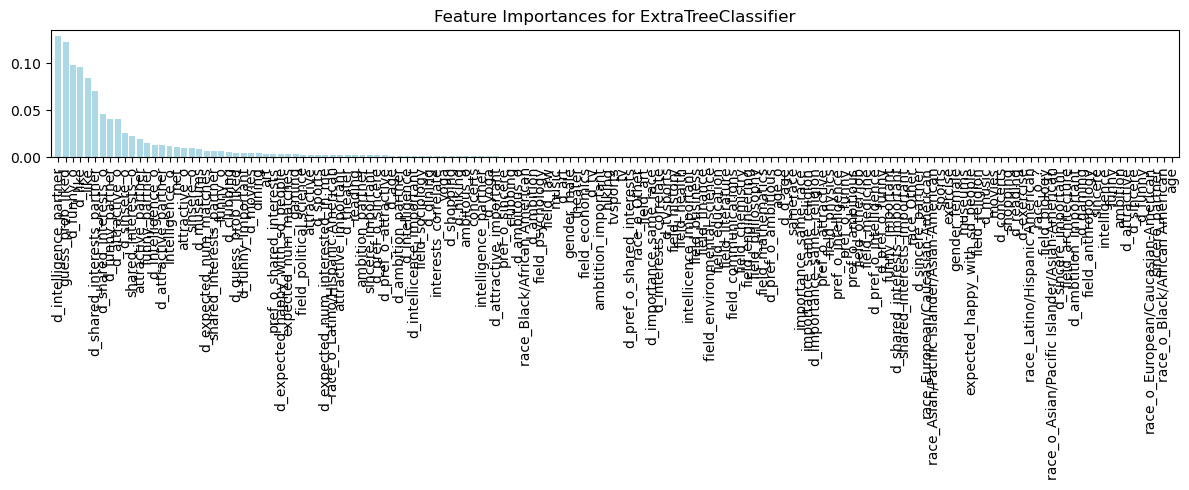

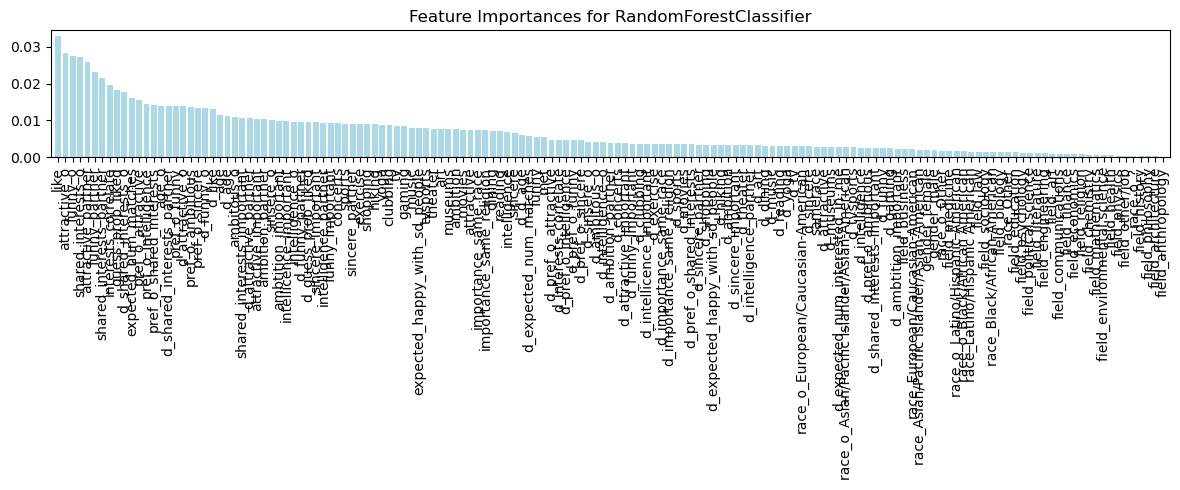

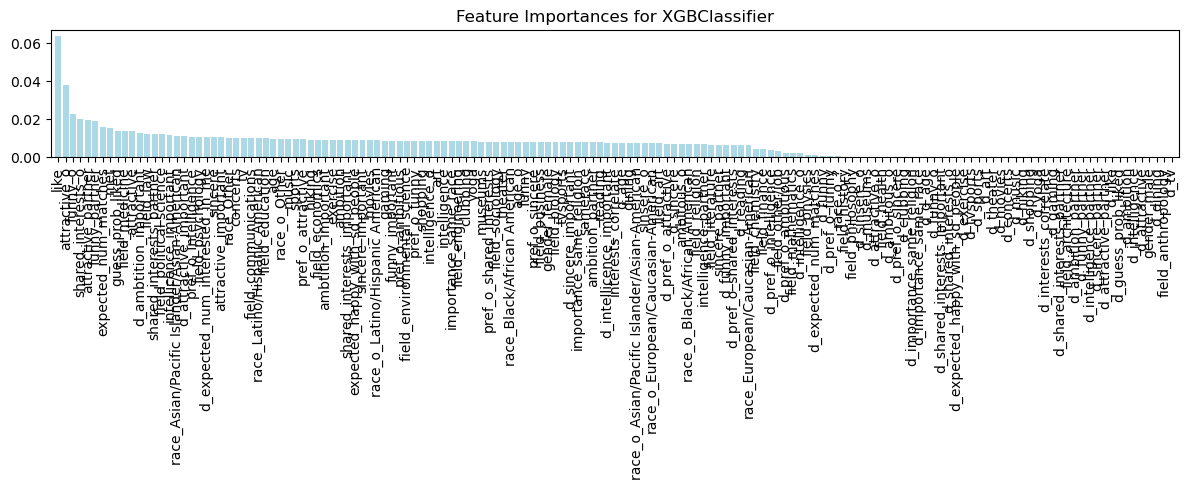

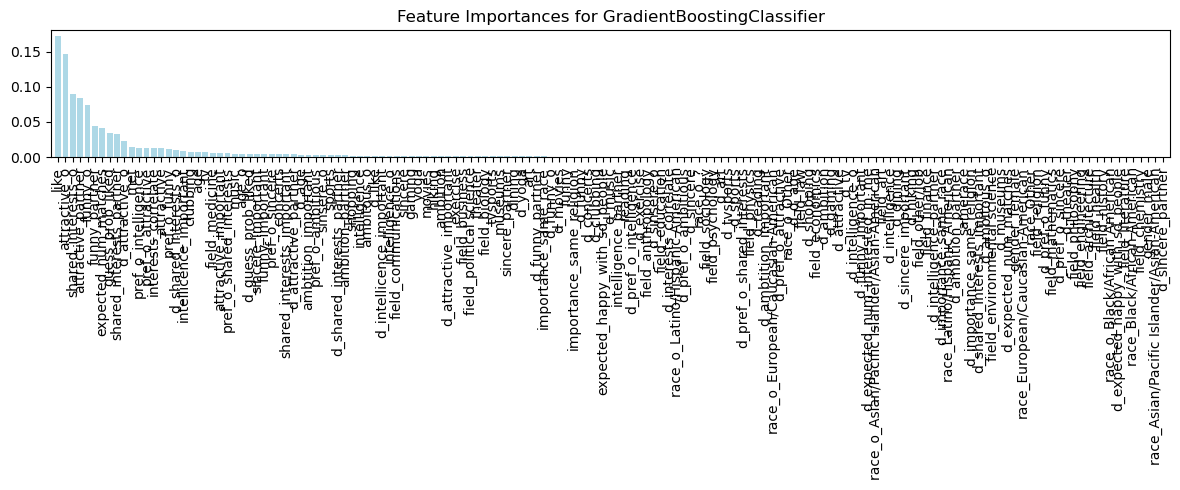

In [60]:
plot_mean_feature_importances(clf_comp_Full_FeatureSet, mean_feature_importances, X_data=X_train)

### 2.1 Logistic Regression

### 2.2 Naive Bayes

### 2.3 Linear Discriminant Analysis

### 2.4 Support Vector Machines

### 2.5 K-Nearest Neighbors